# This script demonstrates the k-means algorithm
# Name : Sunjun Hwang
# Student ID : 20151766
# github link : https://github.com/tjswns494/Mathematical-Foundations-for-Computer-Vision-and-Machine-Learning-assignment.git

# import packages for plotting graphs and manipulating data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# define the average function which calculate average of the given list

In [2]:
def average(list):
    num = 0
    for i in range (len(list)):
        num = num + list[i]
    return (num)/len(list)

# generate the points around the given cluster point

In [3]:
def generatePointCluster(cluster,cluster_point,point_num):
    for i in range(0,len(cluster_point),1):
        randx=[0 for rows in range(point_num)]
        randy=[0 for rows in range(point_num)]
        for j in range(0,point_num,1):
            randx[j]=random.random()
            randy[j]=random.random()
        averagex=average(randx)
        averagey=average(randy)
        demeanx=[0 for rows in range(point_num)]
        demeany=[0 for rows in range(point_num)]
        for j in range(0,point_num,1):
            demeanx[j]=int((randx[j]-averagex)*100)
            demeany[j]=int((randy[j]-averagey)*100)
            cluster[i*point_num+j][0]=cluster_point[i][0]+demeanx[j]
            cluster[i*point_num+j][1]=cluster_point[i][1]+demeany[j]
    return cluster

# define the distance between two points

In [4]:
def computeDistance(point1,point2):
    distance=math.pow((point1[0]-point2[0]),2)+math.pow((point1[1]-point2[1]),2)
    return distance

# define the initial label to each points

In [5]:
def initialiseLabel(cluster,cluster_num):
    randomnum=[0 for cols in range(len(cluster))]
    for i in range(0,len(cluster),1):
        randomnum[i]=i%3
    random.shuffle(randomnum)
    for i in range(0,len(cluster),1):
        cluster[i][2]=randomnum[i]
    return cluster

# define the center point of each clusters

In [6]:
def computeCentroid(centroid,cluster,cluster_num):
    labelnum=[0 for cols in range(cluster_num)]
    for i in range(0,cluster_num,1):
        centroid[i][0]=0
        centroid[i][1]=0

    for i in range(0,len(cluster),1):
        centroid[(cluster[i][2])][0]+=int(cluster[i][0])
        centroid[(cluster[i][2])][1]+=int(cluster[i][1])
        labelnum[(cluster[i][2])]+=1
    for i in range(0,cluster_num,1):
        if(labelnum[i]==0):
            centroid[i][0]=0
            centroid[i][1]=0
        else:
            centroid[i][0]=int(int(centroid[i][0])/labelnum[i])
            centroid[i][1]=int(int(centroid[i][1])/labelnum[i])
    return centroid

# define the label to given points

In [7]:
def assignLabel(cluster,centroid):

    distance=0
    for i in range(0,len(cluster),1):
        for j in range(0,len(centroid),1):
            distance=computeDistance(centroid[j],cluster[i])
            if(j==0):
                min=distance
                cluster[i][2]=0
            elif(min>distance):
                min=distance
                cluster[i][2]=j
    return cluster

# define the energy of each cluster

In [8]:
def computeEnergy(cluster,centroid):
    energy=0
    for i in range(0,len(cluster),1):
        energy+=computeDistance(centroid[cluster[i][2]],cluster[i])
    energy/=len(cluster)
    return energy

# get cluster number & center point
point_num is the number of points we will generate for each cluster

In [9]:
cluster_num=int(input("write the number of cluster:"))
point_num=100
cluster_point=[[0 for cols in range(3)]for rows in range(cluster_num)]
for i in range(0,cluster_num,1):
    cluster_point[i][0]=input("x position:")
    cluster_point[i][1]=input("y position:")
    cluster_point[i][0]=int(cluster_point[i][0])
    cluster_point[i][1]=int(cluster_point[i][1])
    print(cluster_point[i][0],cluster_point[i][1])

write the number of cluster:3
x position:100
y position:100
100 100
x position:-100
y position:-100
-100 -100
x position:100
y position:-100
100 -100


# declare cluster & centroid array

In [10]:
cluster=[[0 for cols in range(3)]for rows in range(len(cluster_point)*point_num)]
centroid=[[0 for cols in range(2)]for rows in range(cluster_num)]

# generate cluster & initialize label for each points

In [11]:
cluster=generatePointCluster(cluster,cluster_point,point_num)
cluster=initialiseLabel(cluster,cluster_num)


# plot the points

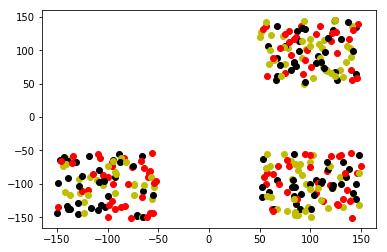

In [12]:
x = np.arange(-150, 150, 0.1)

for i in range(0,len(cluster),1):
    if(cluster[i][2]==0):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='black')
    elif(cluster[i][2]==1):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='r')
    elif(cluster[i][2]==2):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='y')
    elif(cluster[i][2]==3):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='g')
    elif(cluster[i][2]==4):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='b')
plt.show()

all the point's labels are mixed

# compute the centroid for each label

In [13]:
centroid=computeCentroid(centroid,cluster,cluster_num)
for i in range(0,len(centroid),1):
    print("(",centroid[i][0],",",centroid[i][1],")")

( 27 , -36 )
( 31 , -36 )
( 41 , -27 )


# calculate energy until ex-energy and current energy is equal

In [14]:
energy=0
exenergy=-1
while energy!=exenergy:
    cluster=assignLabel(cluster,centroid)
    centroid=computeCentroid(centroid,cluster,cluster_num)
    exenergy=energy
    energy=computeEnergy(cluster,centroid)
    print(energy)

5483.066666666667
1594.5066666666667
1594.5066666666667


# print final label

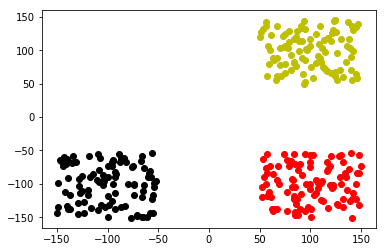

In [15]:
x = np.arange(-150, 150, 0.1)

for i in range(0,len(cluster),1):
    if(cluster[i][2]==0):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='black')
    elif(cluster[i][2]==1):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='r')
    elif(cluster[i][2]==2):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='y')
    elif(cluster[i][2]==3):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='g')
    elif(cluster[i][2]==4):
        plt.plot( cluster[i][0], cluster[i][1], marker='o', color='b')
plt.show()

all of the points are well clustered

# print final centroid

In [16]:
centroid=computeCentroid(centroid,cluster,cluster_num)
for i in range(0,len(centroid),1):
    print("(",centroid[i][0],",",centroid[i][1],")")

( -100 , -100 )
( 100 , -99 )
( 99 , 99 )
